## Project Description
### data Description
1. **What motivated you to choose this dataset?** <br>
An EV dataset can be a valuable choice due to its relevance, data availability, and potential research questions. The growing EV market and government policies make it a timely topic. The large size and diversity of EV data allow for comprehensive analysis.
<br>
<br>
2. **What kind of insight do you hope to gain from this database (What we curious)**<br>
We plan to exam the number and distribution of different EV brands, models, the trends, and electric range capabilities combining with the produced year, for example: we are curious about if the electric range has positive correlation with the year and the customer acceptance (reflecting by the sales amount).
<br>
<br>
3. **How will your analysis help people? (who are these people )**
We can provide valuable insights and prediction for a range of stakeholders. Potential EV buyers, government officials, businesses, environmental advocates, and researchers can benefit from understanding market trends, consumer preferences, policy implications, and environmental impacts.
<br>
<br>
4. **How to select sample**  
The total amount of data is around 200 thousand, we found that there are some duplicates (around 180 thousand) and missing value (around 500), after dropping all of them we gain roughly 11 thousand rows (11969 in total) of data.


### Investigative Question
* What contribute to the advancement in electric range of EVs
* What's the correlation between Electric Range and production year?
* What's the correlation between Electric Range and Electric Vehicle Type?
* What's the correlation between Electric Range and car brands?
* The number of each brand and the distribution of them in Washington State.

##Pseudo Code##

**Identify Data Sources:**<br>
* Assess data from the Department of Licensing. (data.wa.gov)

**Data Collection:**<br>
* Access datasets from identified sources.
* Download relevant data in csv formats.

**Data Preparation:**<br>
* Load dataset into memory.
* Handle and clean dataset:
  * Identify missing values/ duplicate/ 0 from electronic range.
  * Remove all of them.

**Define Questions:**<br>
* Explore what we want to know and how will it make the impact or be meaningful to the future.

**Data Analysis:**<br>
* Identify relevant metrics (e.g., brand, model, year, electric range, price) from the dataset.
* Determine appropriate groups for analysis (e.g., EV type, region, time period).

**Output and Visualization:**<br>
* Use appropriate visualizations (e.g., charts, tables) to enhance understanding.


## Import Dataset Library

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns

## Step1 - clean data
First, to ensure a complete dataset, we should check for any missing values or duplicate entries. After cleaning the data, we obtained 7,071 rows with no missing values in any column.

In [ ]:
# read data from Electric_Vehicle_Population_Data(DataFrame)
raw_data = pd.read_csv("/content/Electric_Vehicle_Population_Data.csv")
# count total row and columns
np.shape(raw_data)

(103392, 17)

In [ ]:
# Show metadata info
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103392 entries, 0 to 103391
Data columns (total 17 columns):
 #   Column                                             Non-Null Count   Dtype  
---  ------                                             --------------   -----  
 0   VIN (1-10)                                         103392 non-null  object 
 1   County                                             103391 non-null  object 
 2   City                                               103391 non-null  object 
 3   State                                              103392 non-null  object 
 4   Postal Code                                        103391 non-null  float64
 5   Model Year                                         103392 non-null  int64  
 6   Make                                               103392 non-null  object 
 7   Model                                              103392 non-null  object 
 8   Electric Vehicle Type                              103392 non-null  object

**Dataset** <br>
**Multiple EV information of Washington State:**

* VIN (1-10): Type: VARCHAR (String) - It’s an alphanumeric identifier.
* County: Type: VARCHAR (String) - The name of the county.
* City: Type: VARCHAR (String) - The name of the city.
* State: Type: VARCHAR (String) - The state abbreviation, typically two characters.
* Postal Code: Type: VARCHAR or INT - Typically stored as a INT to handle leading zeros.
* Model Year: Type: INT - The year the vehicle model was made.
* Make: Type: VARCHAR (String) - The manufacturer of the vehicle (e.g., JEEP, KIA).
* Model: Type: VARCHAR (String) - The specific model of the vehicle (e.g., WRANGLER, SOUL).
* Electric Range: Type: INT - The distance of the vehicle can run per charge time


In [ ]:
# show first five row
raw_data.head(5)

,VIN (1-10),County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility,2020 Census Tract
0,5YJ3E1EB0J,Thurston,Olympia,WA,98512.0,2018,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,215.0,0.0,35.0,104823078.0,POINT (-122.957046 46.991391),PUGET SOUND ENERGY INC,5.306701e+10
1,WA1AAAGE9M,Kitsap,Port Orchard,WA,98367.0,2021,AUDI,E-TRON,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,222.0,0.0,35.0,156660507.0,POINT (-122.6530052 47.4739066),PUGET SOUND ENERGY INC,5.303509e+10
2,5YJ3E1EA2J,Yakima,Yakima,WA,98902.0,2018,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,215.0,0.0,14.0,269374108.0,POINT (-120.530331 46.59534),PACIFICORP,5.307700e+10
3,5YJ3E1EA4N,Yakima,Yakima,WA,98902.0,2022,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0.0,0.0,15.0,213383894.0,POINT (-120.530331 46.59534),PACIFICORP,5.307700e+10
4,7SAYGAEE2P,Snohomish,Bothell,WA,98012.0,2023,TESLA,MODEL Y,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0.0,0.0,1.0,229496046.0,POINT (-122.206146 47.839957),PUGET SOUND ENERGY INC,5.306105e+10


In [ ]:
# step1 : Check if there is null value in DataFrame
raw_data.isnull().sum()

,0
VIN (1-10),0
County,1
City,1
State,0
Postal Code,1
Model Year,0
Make,0
Model,0
Electric Vehicle Type,0
Clean Alternative Fuel Vehicle (CAFV) Eligibility,0


In [ ]:
# Clean up rows with incomplete data
cleaned_data1 = raw_data.dropna()

In [ ]:
# Check if there is null value in DataFrame again
# Now, the data is complete
cleaned_data1.isnull().sum()

,0
VIN (1-10),0
County,0
City,0
State,0
Postal Code,0
Model Year,0
Make,0
Model,0
Electric Vehicle Type,0
Clean Alternative Fuel Vehicle (CAFV) Eligibility,0


In [ ]:
# After deleting the empty data, we have 199602 rows of data
np.shape(cleaned_data1)

(103334, 17)

In [ ]:
# step2 : Check for duplicate data
# We chose the VIN (1-10) column to run with since each car has a unique number
VIN = cleaned_data1.loc[:,['VIN (1-10)']]
VIN

,VIN (1-10)
0,5YJ3E1EB0J
1,WA1AAAGE9M
2,5YJ3E1EA2J
3,5YJ3E1EA4N
4,7SAYGAEE2P
...,...
103386,5YJ3E1EB6J
103387,5UXTA6C07N
103388,7SAYGAEE0R
103389,7SAYGDEE8N


In [ ]:
# Check for duplicates
VIN.duplicated().sum()

92973

In [ ]:
# delete duplicate data based on "VIN (1-10)" column
cleaned_data2 = cleaned_data1.drop_duplicates(subset=['VIN (1-10)'])

In [ ]:
# Calculate how much data is left after removing duplicate values
np.shape(cleaned_data2)

(10361, 17)

After cleaning the data, we found that there are some unusable values ​​in "Battery". There has some situation may led 0 value happen in database:
1. Incorrect data entry: This value may be caused by incorrect data entry that does not record the power range correctly.
2. Pending or Unavailable Information: The range may not have been calculated yet or the information for a specific vehicle entry may not be available.

in this way, we think we should delete the data with Electronic battery = 0

In [ ]:
# step3 : delete some data with Electric Range =0
df = cleaned_data2[cleaned_data2['Electric Range'] != 0]

In [ ]:
# The final Cleaned data
df

,VIN (1-10),County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility,2020 Census Tract
0,5YJ3E1EB0J,Thurston,Olympia,WA,98512.0,2018,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,215.0,0.0,35.0,104823078.0,POINT (-122.957046 46.991391),PUGET SOUND ENERGY INC,5.306701e+10
1,WA1AAAGE9M,Kitsap,Port Orchard,WA,98367.0,2021,AUDI,E-TRON,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,222.0,0.0,35.0,156660507.0,POINT (-122.6530052 47.4739066),PUGET SOUND ENERGY INC,5.303509e+10
2,5YJ3E1EA2J,Yakima,Yakima,WA,98902.0,2018,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,215.0,0.0,14.0,269374108.0,POINT (-120.530331 46.59534),PACIFICORP,5.307700e+10
5,WBY1Z4C51E,Yakima,Yakima,WA,98908.0,2014,BMW,I3,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,72.0,0.0,14.0,8045817.0,POINT (-120.611068 46.596645),PACIFICORP,5.307700e+10
6,5YJSA1DPXC,Thurston,Olympia,WA,98502.0,2012,TESLA,MODEL S,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,265.0,59900.0,22.0,188634442.0,POINT (-122.943445 47.059252),PUGET SOUND ENERGY INC,5.306701e+10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103241,1G1RC6S5XK,Whatcom,Bellingham,WA,98229.0,2019,CHEVROLET,VOLT,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,53.0,0.0,40.0,3242270.0,POINT (-122.442974 48.729016),PUGET SOUND ENERGY INC||PUD NO 1 OF WHATCOM CO...,5.307300e+10
103264,SALWV2RY6L,King,Bellevue,WA,98004.0,2020,LAND ROVER,RANGE ROVER SPORT,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,19.0,0.0,48.0,4745422.0,POINT (-122.202397 47.619252),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),5.303302e+10
103278,YV1H60EP6R,Thurston,Tumwater,WA,98512.0,2024,VOLVO,V60,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,41.0,0.0,22.0,265063417.0,POINT (-122.957046 46.991391),PUGET SOUND ENERGY INC,5.306701e+10
103280,JA4J24A58L,Spokane,Spokane Valley,WA,99206.0,2020,MITSUBISHI,OUTLANDER,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,22.0,0.0,4.0,128791911.0,POINT (-117.256079 47.649248),BONNEVILLE POWER ADMINISTRATION||AVISTA CORP||...,5.306301e+10


In [ ]:
# There has 7071 rows in Cleaned data
np.shape(df)

(6099, 17)

In [ ]:
# Generate descriptive statistics.
df.describe()

,Postal Code,Model Year,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,2020 Census Tract
count,6099.000000,6099.000000,6099.000000,6099.000000,6099.000000,6.099000e+03,6.099000e+03
mean,98216.144614,2019.025906,78.765699,4664.147401,32.240367,2.135729e+08,5.303378e+10
std,245.158311,3.416576,83.801248,20269.927981,13.955310,8.704040e+07,1.348593e+07
min,98001.000000,1999.000000,6.000000,0.000000,1.000000,2.014000e+05,5.300501e+10
25%,98038.000000,2017.000000,22.000000,0.000000,21.000000,1.542971e+08,5.303300e+10
50%,98115.000000,2019.000000,35.000000,0.000000,36.000000,2.188933e+08,5.303302e+10
75%,98312.000000,2022.000000,97.000000,0.000000,45.000000,2.603179e+08,5.303303e+10
max,99362.000000,2025.000000,337.000000,845000.000000,49.000000,4.789099e+08,5.307794e+10


## Step2 - Does the Electric Range increase with the production year?

In [ ]:
# Extract data for correlation analysis
electric_range = df["Electric Range"]
model_year = df["Model Year"]

In [ ]:
# Perform correlation analysis
correlation_coefficient, p_value = stats.pearsonr(electric_range, model_year)

In [ ]:
# Print the correlation coefficient and p-value
print("Correlation Coefficient:", correlation_coefficient)
print("p-value:", p_value)

Correlation Coefficient: -0.2322584232846873
p-value: 1.6775968678796659e-75


A small p-value (essentially 0) indicates that the relationship is statistically significant. At the same time, the correlation coefficient is -0.238, indicating a negative correlation between the two variables, but the correlation is weak (<0.5). So we know that **year is not the main reason for changing electric range**

In [ ]:
# export data to Tableau
Erange_Myear = df.loc[:,['Electric Range','Model Year']]
Erange_Myear.to_csv('Myear_Erange.csv', index=False)

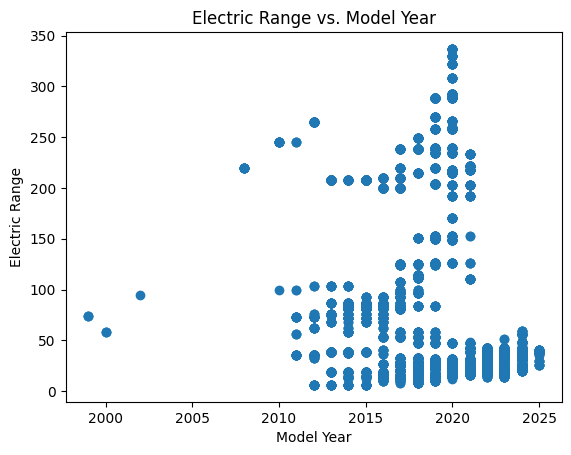

In [ ]:
plt.scatter(model_year, electric_range)
plt.xlabel("Model Year")
plt.ylabel("Electric Range")
plt.title("Electric Range vs. Model Year")
plt.show()

As we can see that, as model year increase electronic range increase as will. However, it is not liner regression between model year and Electronic Range. And for the average, the Correlation Coefficient is minus, means that there actually minus relationship. There is no relationship between Electronic Range and Model Year.

## Step3 - Does the Electric Range increase with the Electric Vehicle Type?

From the result above, we decied to explore correlation between Electric Range and Electric Vehicle Type. We noticed the hybrid car focuses on using electric power to increase efficiency of conventional gas. This suggests that these hybrid cars won't have high electric range. Thus, we decide to separate Electric Vehicle Type and elevauate their electric range performance.

In [ ]:
# step1: Group by 'Make' and 'Electric Vehicle Type' and count Electric Range using .groupby() and .mean()
ev_type_counts = round(df.groupby(['Make', 'Electric Vehicle Type'])['Electric Range'].mean(),2)

In [ ]:
#step2: Separate the data into two tables and sort them in descending order - BEV
print("Battery Electric Vehicle (BEV) Table:")
ev_type_counts.loc[ev_type_counts.index.get_level_values('Electric Vehicle Type') == 'Battery Electric Vehicle (BEV)'].sort_values(ascending=False)

Battery Electric Vehicle (BEV) Table:


,,Electric Range
Make,Electric Vehicle Type,
TESLA,Battery Electric Vehicle (BEV),237.15
JAGUAR,Battery Electric Vehicle (BEV),234.00
POLESTAR,Battery Electric Vehicle (BEV),233.00
AUDI,Battery Electric Vehicle (BEV),213.27
HYUNDAI,Battery Electric Vehicle (BEV),211.84
PORSCHE,Battery Electric Vehicle (BEV),197.78
CHEVROLET,Battery Electric Vehicle (BEV),197.38
KIA,Battery Electric Vehicle (BEV),153.25
NISSAN,Battery Electric Vehicle (BEV),122.71


In [ ]:
#step2: Separate the data into two tables and sort them in descending order - PHEV
print("\nPlug-in Hybrid Electric Vehicle (PHEV) Table:")
ev_type_counts.loc[ev_type_counts.index.get_level_values('Electric Vehicle Type') == 'Plug-in Hybrid Electric Vehicle (PHEV)'].sort_values(ascending=False)


Plug-in Hybrid Electric Vehicle (PHEV) Table:


,,Electric Range
Make,Electric Vehicle Type,
WHEEGO ELECTRIC CARS,Plug-in Hybrid Electric Vehicle (PHEV),100.00
HONDA,Plug-in Hybrid Electric Vehicle (PHEV),44.68
CHEVROLET,Plug-in Hybrid Electric Vehicle (PHEV),43.08
BMW,Plug-in Hybrid Electric Vehicle (PHEV),40.89
CADILLAC,Plug-in Hybrid Electric Vehicle (PHEV),37.00
LEXUS,Plug-in Hybrid Electric Vehicle (PHEV),36.78
FISKER,Plug-in Hybrid Electric Vehicle (PHEV),33.00
ALFA ROMEO,Plug-in Hybrid Electric Vehicle (PHEV),33.00
TOYOTA,Plug-in Hybrid Electric Vehicle (PHEV),32.67


<ipython-input-28-f41ba2bc049c>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Electric Vehicle Type', y='Electric Range', data=df, palette='Set2')
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tupl

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.10/dist-packages/matplotlib/pyplot.py'>

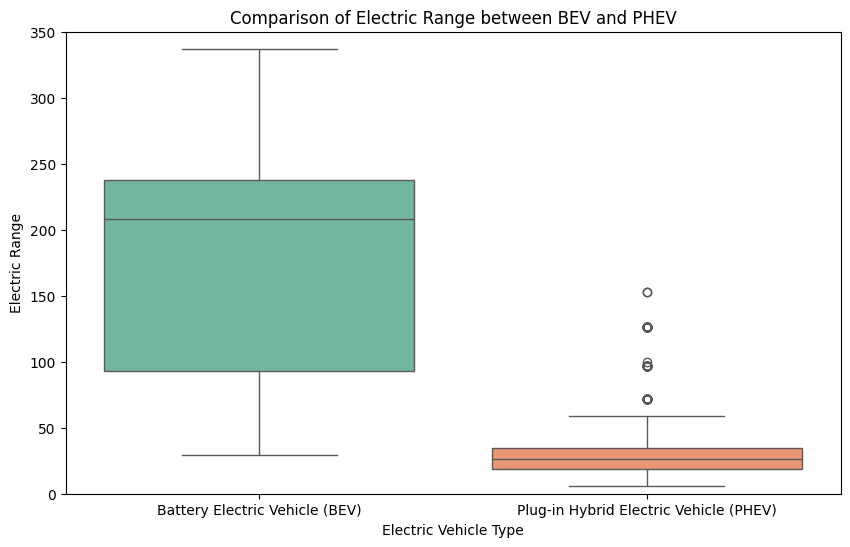

In [ ]:
# Step4: Creating a boxplot to compare Electric Range between BEV and PHEV
plt.figure(figsize=(10, 6))
sns.boxplot(x='Electric Vehicle Type', y='Electric Range', data=df, palette='Set2')
plt.ylim(0, 350)
plt.title('Comparison of Electric Range between BEV and PHEV')
plt.xlabel('Electric Vehicle Type')
plt

In [ ]:
# Step2: Calculate the correlation between Electric Vehicle and Model Year for each Eletric Vehicle Type
bev= df[df['Electric Vehicle Type'] == 'Battery Electric Vehicle (BEV)']
phev = df[df['Electric Vehicle Type'] == 'Plug-in Hybrid Electric Vehicle (PHEV)']
bev_corr = round(bev['Electric Range'].corr(bev['Model Year']),3)
phev_corr = round(phev['Electric Range'].corr(phev['Model Year']),3)
print("Correlation between Electric Range and Model Year for BEV:", bev_corr)
print("Correlation between Electric Range and Model Year for PHEV:", phev_corr)

Correlation between Electric Range and Model Year for BEV: 0.43
Correlation between Electric Range and Model Year for PHEV: 0.032


Battery Electric Vehicles (BEV):
The correlation is **0.414**, indicating a moderate positive relationship.
This suggests that newer BEV models tend to have a higher electric range, which is consistent with the advancements in battery technology over time.<br>
<br>
Plug-in Hybrid Electric Vehicles (PHEV):
The correlation is **0.034**, showing almost no relationship.
This is because the electric range of PHEVs is less of a focus compared to BEVs, as PHEVs are designed to operate on both eledctric and conventional fuel.


In this way, we get **Electric range is related to the type of electric vehicle**

In [ ]:
# further see the relationshp between Electric Range and Model Year in BEV
bev_df = df[df['Electric Vehicle Type'] == 'Battery Electric Vehicle (BEV)']

In [ ]:
bev_electric_range = bev_df['Electric Range']
bev_model_year = bev_df["Model Year"]

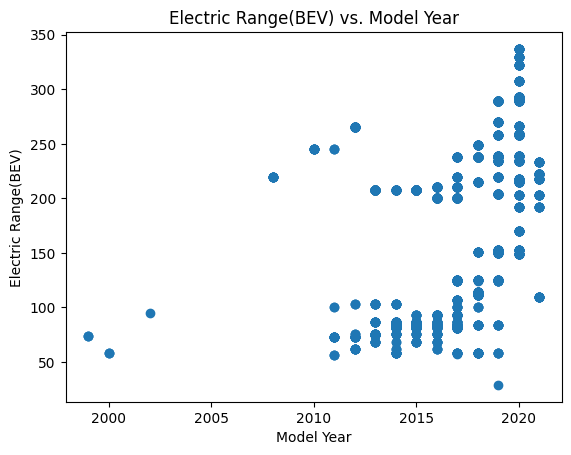

In [ ]:
plt.scatter(bev_model_year, bev_electric_range)
plt.xlabel("Model Year")
plt.ylabel("Electric Range(BEV)")
plt.title("Electric Range(BEV) vs. Model Year")
plt.show()

## Step4 - Further analysis the relationship between Electric Range and car brands

By getting the moderate positive relationship between model year and Electric Range in BEV, we want to dig deeper on each brand and see if brand has an impact on the line chart. We want to see the average eletronic range from each car brand.


In [ ]:
# step1: select Electric Vehicle Type as Battery Electric Vehicle (BEV)
bev_df = df[df['Electric Vehicle Type'] == 'Battery Electric Vehicle (BEV)']
bev_df.loc[:,['Make','Model Year','Electric Range']]

# average Eletric Range (calculate to the second decimal place) by grouping 'Make', 'Model', 'Model Year'
avg_range = round(df.groupby(['Make', 'Model Year'])['Electric Range'].mean(),2)

In [ ]:
avg_range_df = avg_range.reset_index()
sort_avg_range_df = avg_range_df.sort_values(by='Electric Range', ascending=False)
sort_avg_range_df.head(10)

,Make,Model Year,Electric Range
180,TESLA,2020,300.19
179,TESLA,2019,269.83
172,TESLA,2012,265.00
37,CHEVROLET,2020,259.00
171,TESLA,2011,245.00
170,TESLA,2010,245.00
178,TESLA,2018,234.95
84,JAGUAR,2019,234.00
85,JAGUAR,2020,234.00
149,POLESTAR,2021,233.00


In [ ]:
Make_group = sort_avg_range_df.groupby('Make')['Electric Range'].mean().reset_index()
Make_group = Make_group.sort_values(by='Electric Range', ascending=False)
Make_group = Make_group.head(5)
Make_group

,Make,Electric Range
29,TESLA,234.435833
14,JAGUAR,234.000000
25,POLESTAR,233.000000
32,VOLKSWAGEN,108.200000
24,NISSAN,106.377000


In [ ]:
tesla_df = sort_avg_range_df[sort_avg_range_df['Make'] == 'TESLA']
correlation, p_value = stats.pearsonr(tesla_df['Model Year'], tesla_df['Electric Range'])

# Display results
print('Pearson Correlation Coefficient:', correlation)
print('p-value:', p_value)

Pearson Correlation Coefficient: 0.29115344906420293
p-value: 0.3585413414942139


In [ ]:
jaguar_df = sort_avg_range_df[sort_avg_range_df['Make'] == 'JAGUAR']
correlation, p_value = stats.pearsonr(jaguar_df['Model Year'], jaguar_df['Electric Range'])

# Display results
print('Pearson Correlation Coefficient:', correlation)
print('p-value:', p_value)

Pearson Correlation Coefficient: nan
p-value: nan


<ipython-input-93-85f35c43ce38>:2: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  correlation, p_value = stats.pearsonr(jaguar_df['Model Year'], jaguar_df['Electric Range'])


In [ ]:
volkswagen_df = sort_avg_range_df[sort_avg_range_df['Make'] == 'VOLKSWAGEN']
correlation, p_value = stats.pearsonr(volkswagen_df['Model Year'], volkswagen_df['Electric Range'])

# Display results
print('Pearson Correlation Coefficient:', correlation)
print('p-value:', p_value)

Pearson Correlation Coefficient: 0.8660254037844386
p-value: 0.05766888562243737


In [ ]:
nissan_df = sort_avg_range_df[sort_avg_range_df['Make'] == 'NISSAN']
correlation, p_value = stats.pearsonr(nissan_df['Model Year'], nissan_df['Electric Range'])

# Display results
print('Pearson Correlation Coefficient:', correlation)
print('p-value:', p_value)

Pearson Correlation Coefficient: 0.9050084432864125
p-value: 0.00031719971439547165


From the table above, we can see that Tesla's performance is more related to the high performance of its electric range. However, we also need to use a line chart to further analyze each car brand.

In [ ]:
# export data to Tableau
sort_avg_range_df.to_csv('make_Myear_Erange.csv', index=False)

## step5 - The distribution in Washington State.

In [ ]:
df.head()
# Step 1: Filter for Washington State
washington_state_data = df[df['State'] == 'WA']

# Step 2: Count the occurrences of each brand
brand_counts = washington_state_data['Make'].value_counts()

# Step 3: Calculate the distribution
brand_distribution = (brand_counts / brand_counts.sum()) * 100

# Step 4: Group by 'County', and count the number of occurrences for each combination
county_distribution = washington_state_data.groupby(['County']).size().reset_index(name='Count')

# Step 5: Sort the value
county_distribution.sort_values(by='Count', ascending=False)

,County,Count
11,King,4061
3,Clark,735
12,Kitsap,395
23,Snohomish,269
26,Thurston,245
30,Yakima,61
4,Cowlitz,60
19,Pierce,55
10,Jefferson,49
9,Island,36


In [ ]:
# export data to Tableau
county_distribution.to_csv('county_distribution.csv', index=False)

## Stpe6 - Data Limitation

In [ ]:
# Counting the number of cars eligible for Clean Alternative Fuel Vehicle, group by Electric Vehicle Type
df.groupby('Electric Vehicle Type')['Clean Alternative Fuel Vehicle (CAFV) Eligibility'].value_counts()


Electric Vehicle Type                   Clean Alternative Fuel Vehicle (CAFV) Eligibility
Battery Electric Vehicle (BEV)          Clean Alternative Fuel Vehicle Eligible              1962
                                        Not eligible due to low battery range                   1
Plug-in Hybrid Electric Vehicle (PHEV)  Not eligible due to low battery range                2248
                                        Clean Alternative Fuel Vehicle Eligible              1888
Name: count, dtype: int64

We attempted to explore the correlation between the incentive program (Clean Alternative Fuel Vehicle (CAFV) Eligibility, which refers to vehicles eligible for sales and use tax exemptions) and the number of electric vehicles owned. However, this analysis faces a key limitation:<br>
- Lack of Comparison Dataset: The dataset we have only includes electric vehicles, meaning we cannot make a direct comparison with gasoline-powered vehicles. The effectiveness of the Clean Alternative Fuel Vehicle Eligibility incentive program can only be fully assessed by comparing trends in electric vehicle ownership with those in gasoline vehicle ownership over the same period.

## Step7 - Data Possibilities

Moving forward from what we have<br>
**Prediction of Electric Vehicle Registrations in Future Years**
Using historical data on Model Year, County, and Make, it is possible to predict how the number of registered EVs will change in future years and forecast future adoption by region or brand<br>
<br>
**Prediction of the Number of EVs by Brand with Increasing Electric Range**
By analyzing the correlation between Brand and Electric Range, a predictive model can be built to estimate how improvements in range influence the popularity of different brands.
